In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

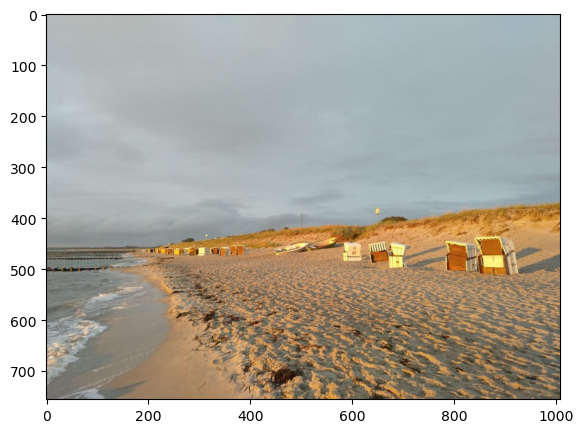

In [2]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x1e8e562ce50>)

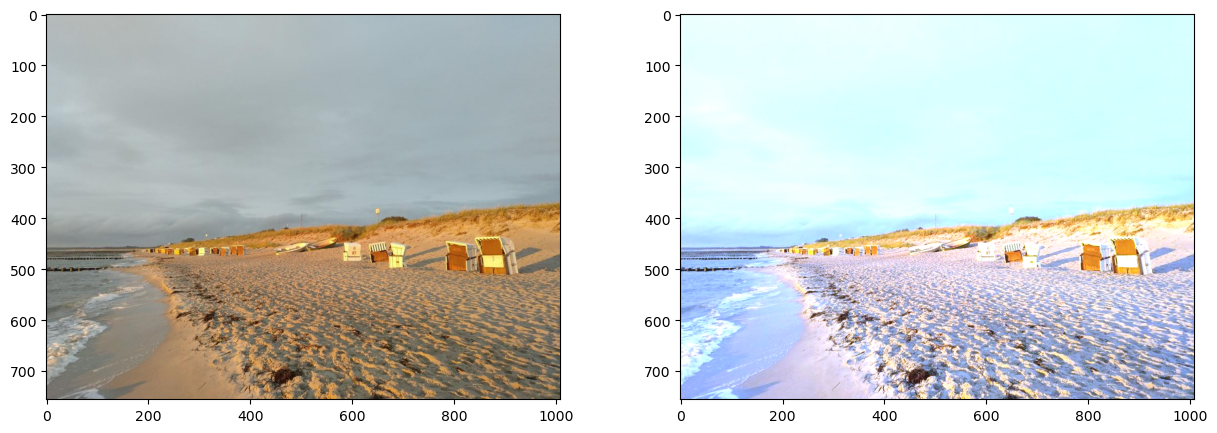

In [7]:
# Define white patch and the coefficients
row, col = 470, 900
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)


(<Axes: >, <matplotlib.image.AxesImage at 0x1e8e0ebe1d0>)

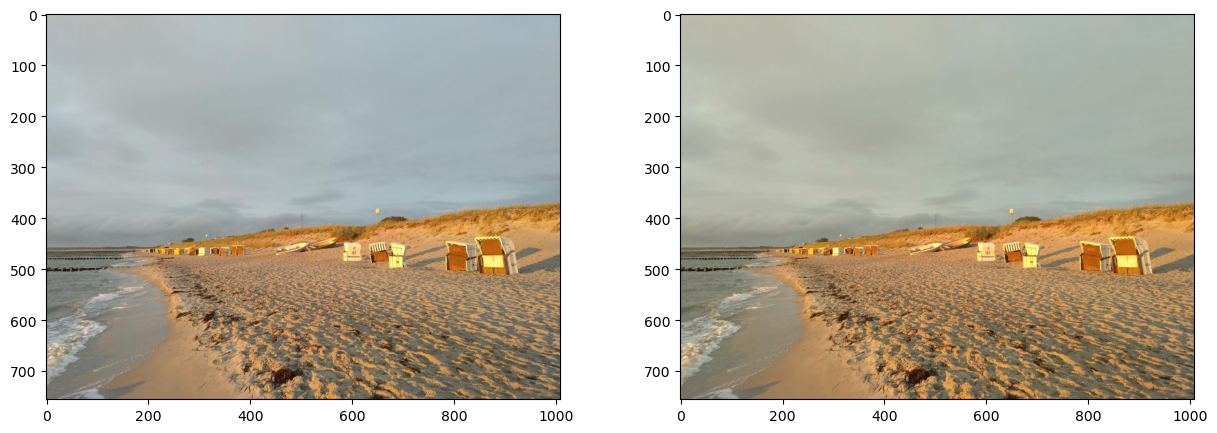

In [4]:
# Load your image
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kg = 1.0
kr = mean_r / mean_g
kb = mean_b / mean_g

# Apply color balancing and generate the balanced image

balanced = np.clip(img.astype(float) * np.array([kr, 1.0, kb]), 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1e8c80d7430>)

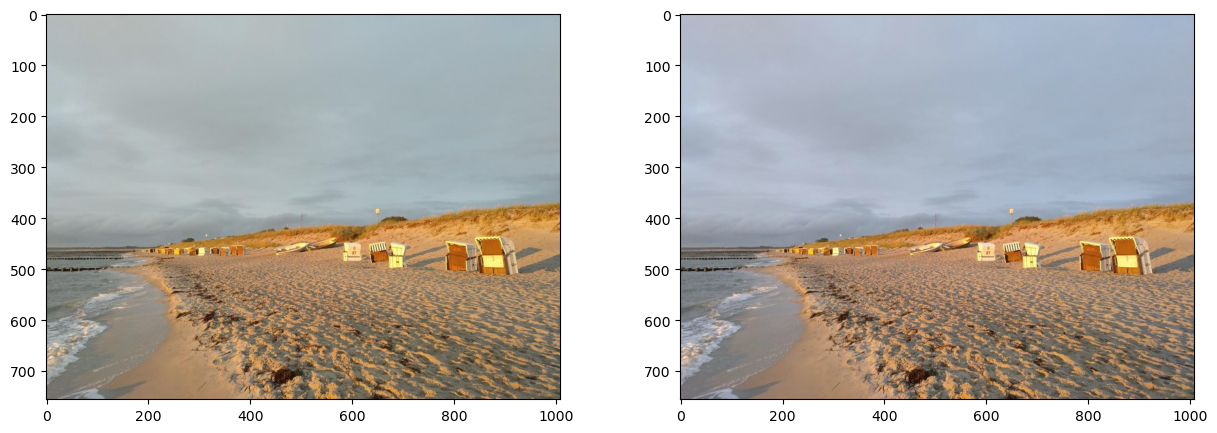

In [5]:
# Load your image
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to floating point representation
img_float = img.astype(float)

# Compute the maximum values for each colour channel (red, green, blue)
max_r = np.max(img_float[:, :, 0])
max_g = np.max(img_float[:, :, 1])
max_b = np.max(img_float[:, :, 2])

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img_float)
balanced[:, :, 0] = img_float[:, :, 0] / max_r
balanced[:, :, 1] = img_float[:, :, 1] / max_g
balanced[:, :, 2] = img_float[:, :, 2] / max_b

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)